In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
import sys
import numpy
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
DATA = '/Users/krishnakalyan3/Educational/PumpIt/data/original/'

In [9]:
train_x = pd.read_csv(DATA + 'train_set_values.csv')

In [10]:
train_x.head().T

,0,1,2,3,4
id,69572,8776,34310,67743,19728
amount_tsh,6000,0,25,0,0
date_recorded,2011-03-14,2013-03-06,2013-02-25,2013-01-28,2011-07-13
funder,Roman,Grumeti,Lottery Club,Unicef,Action In A
gps_height,1390,1399,686,263,0
installer,Roman,GRUMETI,World vision,UNICEF,Artisan
longitude,34.9381,34.6988,37.4607,38.4862,31.1308
latitude,-9.85632,-2.14747,-3.82133,-11.1553,-1.82536
wpt_name,none,Zahanati,Kwa Mahundi,Zahanati Ya Nanyumbu,Shuleni
num_private,0,0,0,0,0


#### Understanding Categorical Values

In [24]:
col_is_cat1 = ['funder','installer', 'wpt_name', 'basin', 'subvillage', 'region', 'region_code', 'district_code']
col_is_cat2 = ['lga', 'ward', 'public_meeting', 'public_meeting', 'scheme_management', 'scheme_name', 'permit', 'construction_year']
col_is_cat3 = ['extraction_type', 'extraction_type_group', 'extraction_type_group', 'management', 'management_group']
col_is_cat4 = ['payment', 'payment_type', 'water_quality', 'quality_group', 'source', 'source_type', 'source_class']
col_is_cat5 = ['waterpoint_type', 'waterpoint_type_group']

#### Col Cat 5

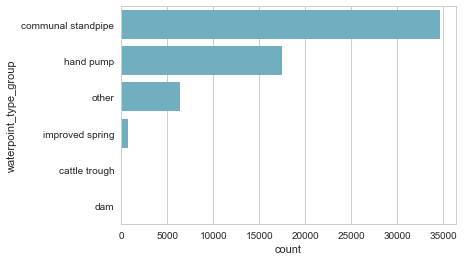

In [20]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

sns.countplot(y="waterpoint_type_group", data=train_x, color="c");

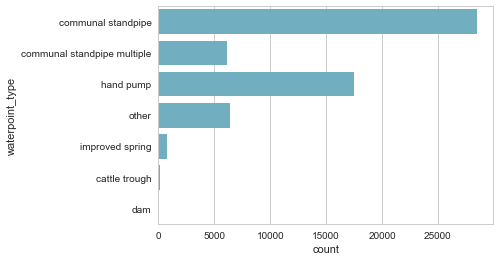

In [21]:
sns.countplot(y="waterpoint_type", data=train_x, color="c");

In [11]:
# Some water points date back to 1960
train_x['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [27]:
for i in train_x.columns:
    na_count = train_x[i].isnull().sum()
    if na_count > 0:
        print('Column Name: {} , count: {}'.format(i, na_count))

Column Name: funder , count: 3635
Column Name: installer , count: 3655
Column Name: subvillage , count: 371
Column Name: public_meeting , count: 3334
Column Name: scheme_management , count: 3877
Column Name: scheme_name , count: 28166
Column Name: permit , count: 3056


There are some missing values that we would need to handle seperately. Median imputation should be okay.